# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


On récupère les données. Elles ont été trouvées dans [ce lien](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). 

C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and oceans from 1978 to 2000. I. Global aspects, SIO Reference Series, No. 01-06, Scripps Institution of Oceanography, San Diego, 88 pages, 2001.

In [2]:
data_file = 'monthly_in_situ_co2_mlo.csv'
data = pd.read_csv(data_file, skiprows=61)
data

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally,Sta
0,,,,,,adjusted,,adjusted fit,filled,adjusted filled,NaN
1,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm],NaN
2,1958,01,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
3,1958,02,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
4,1958,03,21259,1958.2027,315.71,314.43,316.21,314.91,315.71,314.43,MLO
...,...,...,...,...,...,...,...,...,...,...,...
801,2024,08,45519,2024.6230,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
802,2024,09,45550,2024.7077,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
803,2024,10,45580,2024.7896,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
804,2024,11,45611,2024.8743,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO


Il y a un problème avec les en têtes. On concatene les deux premieres lignes et enleve celle de l'unité.

In [3]:
columns_label = ['Yr', 'Mn', 'Date_excel', 'Date', 'CO2', 'seasonally_adjusted',
       'fit', 'seasonally_adjusted_fit', 'CO2_filled', 'seasonally_adjusted_filled', 'Sta']

data.columns = columns_label
data = data.drop([0, 1]).reset_index().drop('index',axis=1)
data


,Yr,Mn,Date_excel,Date,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Sta
0,1958,01,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
1,1958,02,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
2,1958,03,21259,1958.2027,315.71,314.43,316.21,314.91,315.71,314.43,MLO
3,1958,04,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,MLO
4,1958,05,21320,1958.3699,317.51,314.69,317.89,315.07,317.51,314.69,MLO
...,...,...,...,...,...,...,...,...,...,...,...
799,2024,08,45519,2024.6230,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
800,2024,09,45550,2024.7077,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
801,2024,10,45580,2024.7896,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO
802,2024,11,45611,2024.8743,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,MLO


Les données manquantes dans le fichier de base ont été remplacées par -99.99. Elles ne nous interessent pas. On les enlève de l'analyse.

In [4]:
data = data[data['CO2'].astype(float)>0]
data

,Yr,Mn,Date_excel,Date,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Sta
2,1958,03,21259,1958.2027,315.71,314.43,316.21,314.91,315.71,314.43,MLO
3,1958,04,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,MLO
4,1958,05,21320,1958.3699,317.51,314.69,317.89,315.07,317.51,314.69,MLO
6,1958,07,21381,1958.5370,315.87,315.20,315.86,315.22,315.87,315.20,MLO
7,1958,08,21412,1958.6219,314.93,316.22,313.97,315.29,314.93,316.22,MLO
...,...,...,...,...,...,...,...,...,...,...,...
794,2024,03,45366,2024.2049,425.22,423.65,424.92,423.33,425.22,423.65,MLO
795,2024,04,45397,2024.2896,426.30,423.50,426.42,423.60,426.30,423.50,MLO
796,2024,05,45427,2024.3716,426.70,423.29,427.27,423.86,426.70,423.29,MLO
797,2024,06,45458,2024.4563,426.62,424.06,426.67,424.13,426.62,424.06,MLO


On crée une collonne avec les dates compreensibles par pandas

In [5]:
def convert_to_month_start(year, month):
    return pd.Timestamp(year=year, month=month, day=1)

data.loc[:, 'period'] = [convert_to_month_start(y, m) for y, m in zip(data['Yr'].astype(int), data['Mn'].astype(int))]
data

/tmp/ipykernel_33641/3633217335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'period'] = [convert_to_month_start(y, m) for y, m in zip(data['Yr'].astype(int), data['Mn'].astype(int))]


,Yr,Mn,Date_excel,Date,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Sta,period
2,1958,03,21259,1958.2027,315.71,314.43,316.21,314.91,315.71,314.43,MLO,1958-03-01
3,1958,04,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,MLO,1958-04-01
4,1958,05,21320,1958.3699,317.51,314.69,317.89,315.07,317.51,314.69,MLO,1958-05-01
6,1958,07,21381,1958.5370,315.87,315.20,315.86,315.22,315.87,315.20,MLO,1958-07-01
7,1958,08,21412,1958.6219,314.93,316.22,313.97,315.29,314.93,316.22,MLO,1958-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
794,2024,03,45366,2024.2049,425.22,423.65,424.92,423.33,425.22,423.65,MLO,2024-03-01
795,2024,04,45397,2024.2896,426.30,423.50,426.42,423.60,426.30,423.50,MLO,2024-04-01
796,2024,05,45427,2024.3716,426.70,423.29,427.27,423.86,426.70,423.29,MLO,2024-05-01
797,2024,06,45458,2024.4563,426.62,424.06,426.67,424.13,426.62,424.06,MLO,2024-06-01


On fait le plot de la tendance historique

On utilise les periodes en tant qu'index et on les sorte de manière croissante 

In [6]:
sorted_data = data.set_index('period').sort_index()
sorted_data

,Yr,Mn,Date_excel,Date,CO2,seasonally_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled,Sta
period,,,,,,,,,,,
1958-03-01,1958,03,21259,1958.2027,315.71,314.43,316.21,314.91,315.71,314.43,MLO
1958-04-01,1958,04,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,MLO
1958-05-01,1958,05,21320,1958.3699,317.51,314.69,317.89,315.07,317.51,314.69,MLO
1958-07-01,1958,07,21381,1958.5370,315.87,315.20,315.86,315.22,315.87,315.20,MLO
1958-08-01,1958,08,21412,1958.6219,314.93,316.22,313.97,315.29,314.93,316.22,MLO
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,2024,03,45366,2024.2049,425.22,423.65,424.92,423.33,425.22,423.65,MLO
2024-04-01,2024,04,45397,2024.2896,426.30,423.50,426.42,423.60,426.30,423.50,MLO
2024-05-01,2024,05,45427,2024.3716,426.70,423.29,427.27,423.86,426.70,423.29,MLO


On plot les données

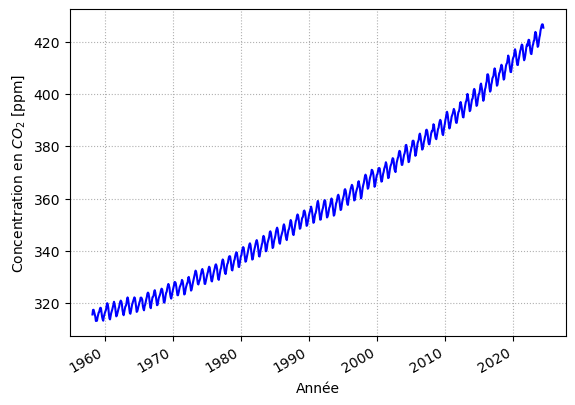

In [7]:
sorted_data['CO2'] = sorted_data['CO2'].astype(float)
sorted_data['CO2'].plot(color='blue')
plt.ylabel(r'Concentration en $CO_2$ [ppm]')
plt.xlabel('Année')
plt.grid(linestyle=':')


On observe deux phénomène couplés : une oscillation périodique annuelle et une contribution plus lente. On essaye de fitter cette contribution plus lente par une exponentielle croissante, selon $$[CO_2] = a \cdot \exp\left(b \cdot t \right) + c$$

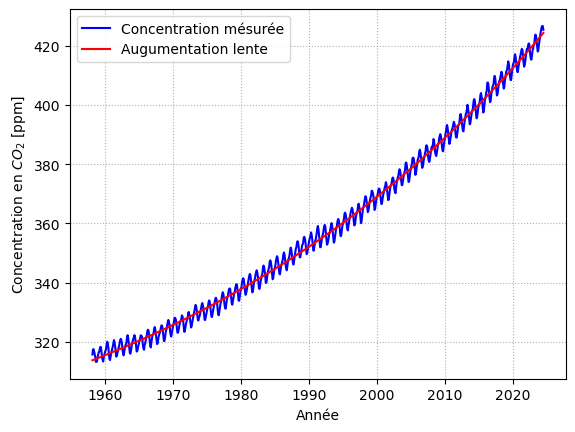

Parametres fittés: a = 54.73, b = 0.0166, c = 258.87


In [8]:
import numpy as np
from scipy.optimize import curve_fit

def exponential_func(t, a, b, c):
    return a * np.exp(b * t) + c

start_year = sorted_data.index.min().year
sorted_data["period_fractional"] = (sorted_data.index.year - start_year) + (sorted_data.index.month - 1) / 12
initial_guess = [1, 0.03, 300]
popt, pcov = curve_fit(exponential_func, sorted_data["period_fractional"], sorted_data["CO2"], p0=initial_guess)
fitted_values = exponential_func(sorted_data["period_fractional"], *popt)
plt.plot(sorted_data.index, sorted_data['CO2'], color='blue', label='Concentration mésurée')
plt.plot(sorted_data.index, fitted_values, color='red', label='Augumentation lente')
plt.legend()
plt.ylabel(r"Concentration en $CO_2$ [ppm]")
plt.xlabel("Année")
plt.grid(linestyle=":")
plt.show()
print(f"Parametres fittés: a = {popt[0]:.2f}, b = {popt[1]:.4f}, c = {popt[2]:.2f}")
